# Restaurant Rate Prediction

In [1]:
# importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [6]:
# Loading the dataset
df=pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


EDA

In [7]:
# shape of data
df.shape

(51717, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
#columns in datasset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [11]:
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']
del df['name']
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [12]:
df.duplicated().sum()

371

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
df.dropna()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51705,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",Pubs and bars,Whitefield
51707,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000",Pubs and bars,Whitefield
51708,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",Pubs and bars,Whitefield
51711,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield


In [17]:
# check null value percent
(df.isna().sum()/df.shape[0])*100

online_order                    0.000000
book_table                      0.000000
rate                           14.645737
votes                           0.000000
location                        0.037004
rest_type                       0.438204
dish_liked                     54.047053
cuisines                        0.083746
approx_cost(for two people)     0.664122
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [18]:
df['dish_liked'].isna().sum()

27751

In [19]:
df['votes']=df['votes'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51346 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51346 non-null  object
 1   book_table                   51346 non-null  object
 2   rate                         43826 non-null  object
 3   votes                        51346 non-null  int32 
 4   location                     51327 non-null  object
 5   rest_type                    51121 non-null  object
 6   dish_liked                   23595 non-null  object
 7   cuisines                     51303 non-null  object
 8   approx_cost(for two people)  51005 non-null  object
 9   listed_in(type)              51346 non-null  object
 10  listed_in(city)              51346 non-null  object
dtypes: int32(1), object(10)
memory usage: 4.5+ MB


In [21]:
df['rate'].isna().sum()

7520

In [23]:
#unique rating in rates columns
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
def cleane_rate(r):

    if(r=="NEW" or r=="-"):
        return np.nan

    else:
        r=str(r).split('/')
        r=r[0]
        return float(r)

In [25]:
df.rate = df["rate"].apply(cleane_rate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [26]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [29]:
#df.rates.str.replace('-',np.NaN)
# df['rate']=df['rate'].str.replace(" ","")
# df['rate']=df['rate'].str.replace('-','NaN')
df['rate']=df['rate'].fillna('NaN')
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4.0, 4.2, 3.9, 3.1, 3.0, 3.2, 3.3, 2.8,
       4.4, 4.3, 'NaN', 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2.0, 1.8], dtype=object)

In [30]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(",","")
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [31]:
df.isna().sum()

online_order                       0
book_table                         0
rate                               0
votes                              0
location                          19
rest_type                        225
dish_liked                     27751
cuisines                          43
approx_cost(for two people)      341
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [32]:
df=df.rename(columns={"approx_cost(for two people)" : "avg_cost",
                      "listed_in(type)" : "meal_type", 
                      "listed_in(city)" : "city"})
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [34]:
df.dropna(subset=['rate','avg_cost','rest_type'],inplace=True)

In [35]:
df['avg_cost']=df['avg_cost'].astype(int)

In [36]:
df.shape

(50801, 11)

In [37]:
df['rate']=df['rate'].astype(float)
df.isna().sum()

online_order        0
book_table          0
rate             9607
votes               0
location            0
rest_type           0
dish_liked      27408
cuisines           19
avg_cost            0
meal_type           0
city                0
dtype: int64

In [38]:
df=df[df.cuisines.isna()==False]
df=df[df.rest_type.isna()==False]
df.isna().sum()

online_order        0
book_table          0
rate             9596
votes               0
location            0
rest_type           0
dish_liked      27389
cuisines            0
avg_cost            0
meal_type           0
city                0
dtype: int64

In [39]:
del df['location']
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


<AxesSubplot: >

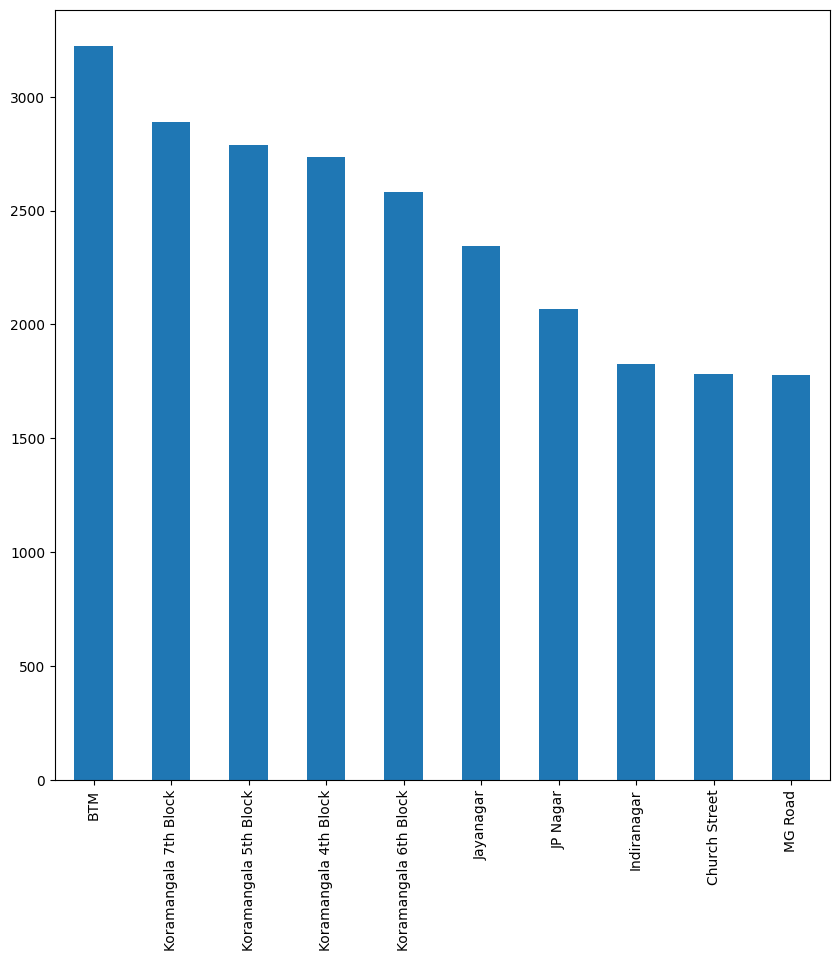

In [41]:
plt.figure(figsize=(10,10))
ax=df.city.value_counts()[:10]
ax.plot(kind='bar')

In [42]:
df=df.drop(['dish_liked','meal_type'],axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
list1=['online_order','book_table','rest_type','cuisines','city']
for i in list1:
    df[i]=le.fit_transform(df[i])

df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,avg_cost,city
0,1,1,4.1,775,27,2145,800,1
1,1,0,4.1,787,27,947,800,1
2,1,0,3.8,918,22,761,800,1
3,0,0,3.7,88,78,2539,300,1
4,0,0,3.8,166,27,2174,600,1


In [45]:
df.shape

(50782, 8)

In [46]:
#Drop null values
df.dropna(how='any',inplace=True)
df.shape

(41186, 8)

In [48]:
# selecing features
features=df.drop(['rate'],axis=1)
features.shape

(41186, 7)

In [49]:
features.dtypes

online_order    int32
book_table      int32
votes           int32
rest_type       int32
cuisines        int32
avg_cost        int32
city            int32
dtype: object

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [51]:
features=StandardScaler().fit(features).transform(features)
features

array([[ 7.23174887e-01,  2.35870854e+00,  4.78673339e-01, ...,
         1.00033474e+00,  4.22720320e-01, -1.60186763e+00],
       [ 7.23174887e-01, -4.23960817e-01,  4.92255868e-01, ...,
        -5.79038265e-01,  4.22720320e-01, -1.60186763e+00],
       [ 7.23174887e-01, -4.23960817e-01,  6.40531810e-01, ...,
        -8.24249766e-01,  4.22720320e-01, -1.60186763e+00],
       ...,
       [-1.38279138e+00, -4.23960817e-01, -3.67970968e-01, ...,
        -5.03892805e-01,  1.92921876e+00,  1.78075343e+00],
       [-1.38279138e+00,  2.35870854e+00, -1.31408588e-01, ...,
        -2.92307140e-03,  4.08135938e+00,  1.78075343e+00],
       [-1.38279138e+00, -4.23960817e-01, -3.83817252e-01, ...,
         3.26721465e-02,  1.92921876e+00,  1.78075343e+00]])

In [54]:
# selecting Class/ Label
label=df['rate'].values
label

array([4.1, 4.1, 3.8, ..., 3.6, 4.3, 3.4])

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.10,random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [57]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [58]:
print(lin_reg.score(X_train,y_train))
print(lin_reg.score(X_test,y_test))

0.29907894004350577
0.28816402836643673


In [59]:
lin_reg_pred=lin_reg.predict(X_test)

In [60]:
from sklearn.metrics import r2_score
lin_reg_score=r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 28.81640283664367


In [61]:
rfr=RandomForestRegressor()
rfr

RandomForestRegressor()

In [62]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9880512630929085
0.9149381438704307


In [64]:
rfr_pred=rfr.predict(X_test)

In [65]:
from sklearn.metrics import r2_score

rfr_score=r2_score(y_test,rfr_pred)*100
print("Accuracy score for LR :",rfr_score)

Accuracy score for LR : 91.49381438704307


In [66]:
rfr.predict([[1,0,13,73,1900,350,27]])

array([4.456])

In [67]:
sample=pd.DataFrame({"Actual Ratin":y_test,
             "Predicted Rating":np.round(rfr_pred,2)})
sample

,Actual Ratin,Predicted Rating
0,3.8,3.77
1,4.1,4.10
2,3.5,3.48
3,4.2,4.20
4,3.4,3.38
...,...,...
4114,3.7,3.73
4115,4.2,4.15
4116,3.3,3.40
4117,3.9,3.82
